## 1. The most Nobel of Prizes
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [1]:
# Loading in required libraries
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
# Reading in the Nobel Prize data
nobel = pd.read_csv('datasets/nobel.csv')

# Taking a look at the first several winners
nobel.sample(n=5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
544,1984,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having made fundamental contributions to ...",1/1,698,Individual,Richard Stone,1913-08-30,London,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,1991-12-06,Cambridge,United Kingdom
730,2001,Peace,The Nobel Peace Prize 2001,"""for their work for a better organized and mor...",1/2,749,Individual,Kofi Annan,1938-04-08,Kumasi,Gold Coast (Ghana),Male,NaN,NaN,NaN,NaN,NaN,NaN
581,1988,Chemistry,The Nobel Prize in Chemistry 1988,"""for the determination of the three-dimensiona...",1/3,271,Individual,Robert Huber,1937-02-20,Munich,Germany,Male,Max-Planck-Institut für Biochemie,Martinsried,Federal Republic of Germany,NaN,NaN,NaN
113,1923,Chemistry,The Nobel Prize in Chemistry 1923,"""for his invention of the method of micro-anal...",1/1,181,Individual,Fritz Pregl,1869-09-03,Laibach (Ljubljana),Austria-Hungary (Slovenia),Male,Graz University,Graz,Austria,1930-12-13,Graz,Austria
587,1988,Medicine,The Nobel Prize in Physiology or Medicine 1988,"""for their discoveries of important principles...",1/3,439,Individual,George H. Hitchings,1905-04-18,"Hoquiam, WA",United States of America,Male,Wellcome Research Laboratories,"Research Triangle Park, NC",United States of America,1998-02-27,"Chapel Hill, NC",United States of America


**Unique Values and Duplicate Records:**

*We will take a look at the number of unique values in each column and checkout the shape of the dataset. The ID column should be unique, that means that the number of rows must be the same as the number of unique values in ID column.*

In [3]:
nobel.shape

(911, 18)

In [4]:
nobel.nunique()

year                    113
category                  6
prize                   579
motivation              565
prize_share               4
laureate_id             904
laureate_type             2
full_name               904
birth_date              868
birth_city              601
birth_country           121
sex                       2
organization_name       295
organization_city       181
organization_country     29
death_date              582
death_city              291
death_country            50
dtype: int64

We realise there are 969 records in the data, however there are only 904 IDs. This indicates we have duplicate records that need to be eliminated.

In [5]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [6]:
df = nobel.copy()

**Missing Values Analysis and Imputation:**

In [7]:
temp=df.copy()

In [8]:
missing_values = temp.isnull().sum()
missing_values

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [9]:
total_cells = np.product(temp.shape) 
total_missing_cells = missing_values.sum()

percentage_missing_values = (total_missing_cells / total_cells) * 100
percentage_missing_values = '%.2f' % percentage_missing_values
print("Missing Data Percentage: " + percentage_missing_values +"%")

Missing Data Percentage: 11.66%


Having calculated the percentage of the missing data, we can't simply drop the records with missing values since the percentage exceeds the safe zone (2-3%). Therefore, further analysis of the missing values is needed. We will start by looking at the "Laureate Type" column.

In [10]:
#check the different values in the column along with their counts
temp['laureate_type'].value_counts()

Individual      881
Organization     30
Name: laureate_type, dtype: int64

We see that there are two unique values for the "Laureate Type" column. 

In [11]:
organization = temp.loc[temp['laureate_type'] == 'Organization']
organization

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
isOrg = df['laureate_type'] == 'Organization'
isBD = pd.notna(df['birth_date'])
mask = isOrg & isBD
mask

0      False
1      False
2      False
3      False
4      False
       ...  
906    False
907    False
908    False
909    False
910    False
Length: 911, dtype: bool

We need to change these records to 'Individual' as they provide two conditions.

In [13]:
df_mask = temp.loc[mask].copy()
df_mask['laureate_type'] = 'Individual'

temp = temp.drop(temp.loc[mask].index, axis=0)
temp = pd.concat([temp, df_mask], axis=0)
temp.shape

(911, 18)

Also check records which are labeled as organization but have a birth date, and expect that none exist anymore.

In [14]:
isOrg = temp['laureate_type'] == 'Organization'
isBD = pd.notna(temp['birth_date'])
mask = isOrg & isBD
temp.loc[mask]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country


Now, Let's analyze the individuals and their missing values.

In [15]:
individual = temp.loc[temp['laureate_type'] == 'Individual']
individual.sample(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
539,1983,Medicine,The Nobel Prize in Physiology or Medicine 1983,"""for her discovery of mobile genetic elements""",1/1,428,Individual,Barbara McClintock,1902-06-16,"Hartford, CT",United States of America,Female,Cold Spring Harbor Laboratory,"Cold Spring Harbor, NY",United States of America,1992-09-02,"Huntington, NY",United States of America
445,1974,Medicine,The Nobel Prize in Physiology or Medicine 1974,"""for their discoveries concerning the structur...",1/3,404,Individual,Christian de Duve,1917-10-02,Thames Ditton,United Kingdom,Male,Rockefeller University,"New York, NY",United States of America,2013-05-04,Nethen,Belgium
546,1984,Medicine,The Nobel Prize in Physiology or Medicine 1984,"""for theories concerning the specificity in de...",1/3,429,Individual,Niels K. Jerne,1911-12-23,London,United Kingdom,Male,Basel Institute for Immunology,Basel,Switzerland,1994-10-07,Castillon-du-Gard,France
79,1914,Chemistry,The Nobel Prize in Chemistry 1914,"""in recognition of his accurate determinations...",1/1,175,Individual,Theodore William Richards,1868-01-31,"Germantown, PA",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,1928-04-02,"Cambridge, MA",United States of America
309,1958,Medicine,The Nobel Prize in Physiology or Medicine 1958,"""for their discovery that genes act by regulat...",1/4,365,Individual,Edward Lawrie Tatum,1909-12-14,"Boulder, CO",United States of America,Male,Rockefeller Institute for Medical Research,"New York, NY",United States of America,1975-11-05,"New York, NY",United States of America


In [16]:
ind_missing_values = individual.isnull().sum()
ind_missing_values

year                      0
category                  0
prize                     0
motivation               72
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date                2
birth_city                2
birth_country             0
sex                       0
organization_name       220
organization_city       218
organization_country    218
death_date              292
death_city              309
death_country           303
dtype: int64

Some death date records are NaNs. If someone is not dead, this's normal. But if there are NAN records in the date of birth column, this is not normal. Probably these records should be 'Organization'. 

In [17]:
isInd = temp['laureate_type'] == 'Individual'
isBDNaN = pd.isna(temp['birth_date'])
mask = isInd & isBDNaN
temp.loc[mask]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
816,2009,Chemistry,The Nobel Prize in Chemistry 2009,"""for studies of the structure and function of ...",1/3,841,Individual,Venkatraman Ramakrishnan,NaN,"Chidambaram, Tamil Nadu",India,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,NaN,NaN,NaN
850,2011,Physics,The Nobel Prize in Physics 2011,"""for the discovery of the accelerating expansi...",1/2,864,Individual,Saul Perlmutter,NaN,"Champaign-Urbana, IL",United States of America,Male,Lawrence Berkeley National Laboratory,"Berkeley, CA",United States of America,NaN,NaN,NaN


Also using the internet we get that the birth date of Venkatraman Ramakrishnan is 1 April 1952, and the birth date of Saul Perlmutter is 22 September 1959. We as well fill them manually. We first however inspect the type of the date column. We have to change it in both original df and temp.

In [18]:
df.loc[df['full_name'] == 'Venkatraman Ramakrishnan', 'birth_date'] = '1952-1-4'
df.loc[df['full_name'] == 'Saul Perlmutter', 'birth_date'] = '1959-22-9'

In [19]:
temp.loc[df['full_name'] == 'Venkatraman Ramakrishnan', 'birth_date'] = '1952-1-4'
temp.loc[df['full_name'] == 'Saul Perlmutter', 'birth_date'] = '1959-22-9'

Now, let's check the missing values in individuals.

In [20]:
individual = temp.loc[temp['laureate_type'] == 'Individual']
ind_missing_values = individual.isnull().sum()
ind_missing_values

year                      0
category                  0
prize                     0
motivation               72
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date                0
birth_city                2
birth_country             0
sex                       0
organization_name       220
organization_city       218
organization_country    218
death_date              292
death_city              309
death_country           303
dtype: int64

In [21]:
df['birth_year'] = df['birth_date'].str[0:4]
df['birth_year'] = df['birth_year'].replace(to_replace='NaN', value=0)
df['birth_year'] = df['birth_year'].apply(pd.to_numeric)

In [22]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,birth_year
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1852.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1839.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1854.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1828.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1822.0


In [23]:
df['age'] = df['year'] - df['birth_year']

In [24]:
cols = df.columns.tolist()
cols_ord = cols[0:9] + cols[18:20] + cols[9:18]
df = df[cols_ord]

df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_year,age,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,1852.0,49.0,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,1839.0,62.0,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,1854.0,47.0,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,1828.0,73.0,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,1822.0,79.0,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [25]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
display(len(df['prize']))

# Display the number of prizes won by male and female recipients.
display(df['sex'].value_counts())

# Display the number of prizes won by the top 10 nationalities.
df['birth_country'].value_counts().head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>

In [26]:
# Calculating the proportion of USA born winners per decade
df['usa_born_winner'] = df['birth_country'] == 'United States of America'
#print(nobel)

df['decade'] = (np.floor(df['year']/10)*10).astype(int)

prop_usa_winners = df.groupby('decade', as_index=False)['usa_born_winner'].mean()


# Display the proportions of USA born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

In [27]:
df.shape

(911, 22)

In [28]:
#df = df[~df.index.duplicated()]

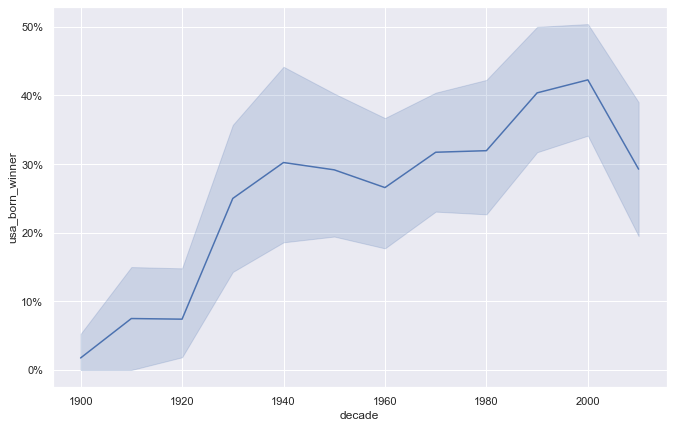

In [29]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(data = df, x='decade', y='usa_born_winner')

# Adding %-formatting to the y-axis

ax.yaxis.set_major_formatter(PercentFormatter(1.0))

### Nobel Prizes by Category from 1901 to 2016

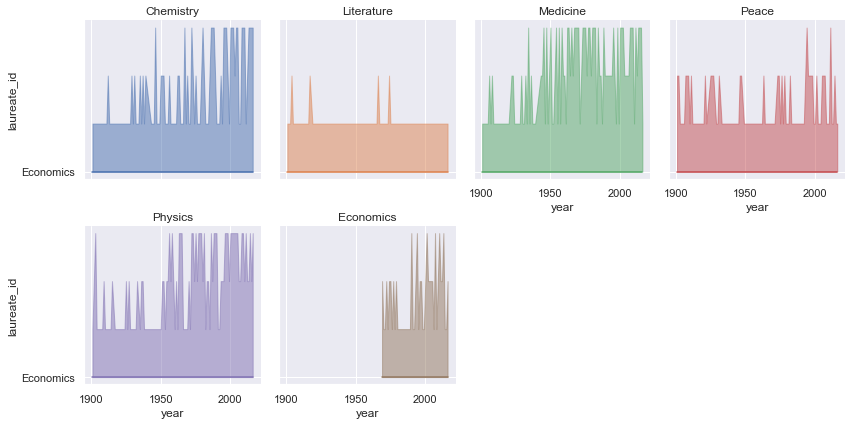

In [30]:
year_cat=df.groupby(['year','category'])['laureate_id'].count().reset_index()
year_cat
g = sns.FacetGrid(year_cat, col='category', hue='category', col_wrap=4, )
g = g.map(plt.plot, 'year', 'category')
g = g.map(plt.fill_between, 'year', 'laureate_id', alpha=0.5).set_titles("{col_name} category")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.95)
 
plt.show()

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

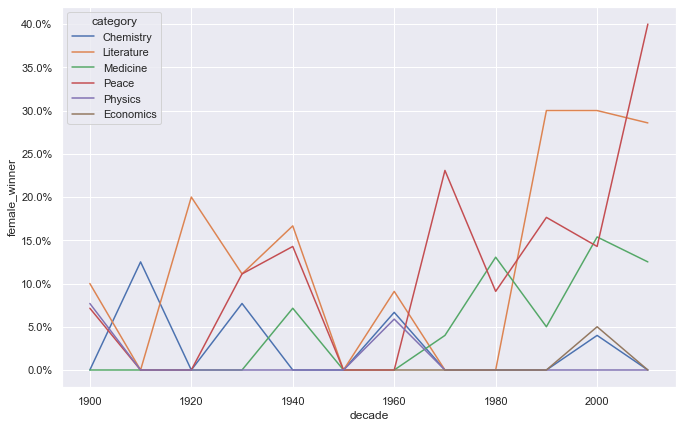

In [31]:
# Calculating the proportion of female laureates per decade
df['female_winner'] = df['sex'] == 'Female'
prop_female_winners = df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
#print(prop_female_winners)

# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(data = prop_female_winners, x='decade', y='female_winner', hue='category')

ax.yaxis.set_major_formatter(PercentFormatter(1.0))

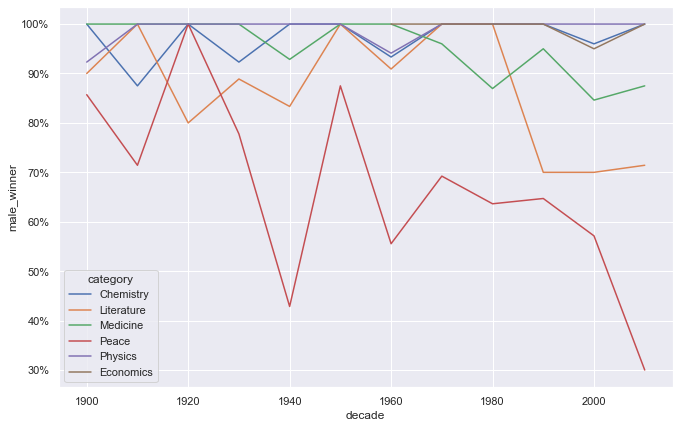

In [32]:
df['male_winner'] = df['sex'] == 'Male'
prop_male_winners = df.groupby(['decade', 'category'], as_index=False)['male_winner'].mean()

ax = sns.lineplot(data = prop_male_winners, x='decade', y='male_winner', hue='category')
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

### Nobel Prize by Country/Category/Sex

In [33]:
sex=df['sex'].value_counts()

# Display the number of prizes won by the top 10 nationalities.
country=df['birth_country'].value_counts().head(10)

cat=df['category'].value_counts()

Let's look at the genders first.

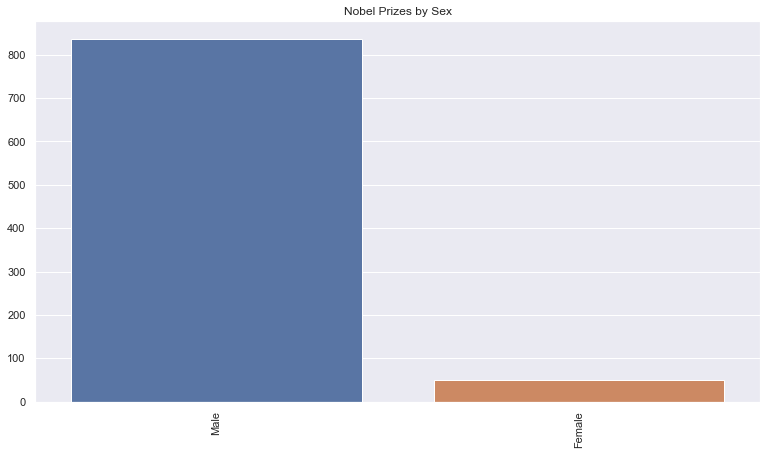

In [34]:
plt.rcParams['figure.figsize'] = [13, 7]
sns.barplot(x=sex.index,y=sex.values)
plt.xticks(rotation=90)
plt.title('Nobel Prizes by Sex')
plt.show()

Now, let's look at the country.

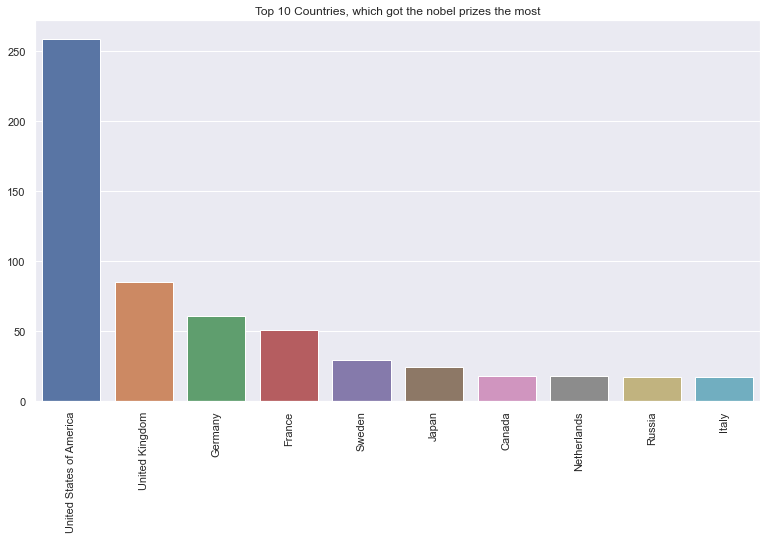

In [35]:
sns.barplot(x=country.index,y=country.values)
plt.xticks(rotation=90)
plt.title('Top 10 Countries, which got the nobel prizes the most')
plt.show()

Now, let's look at the category.

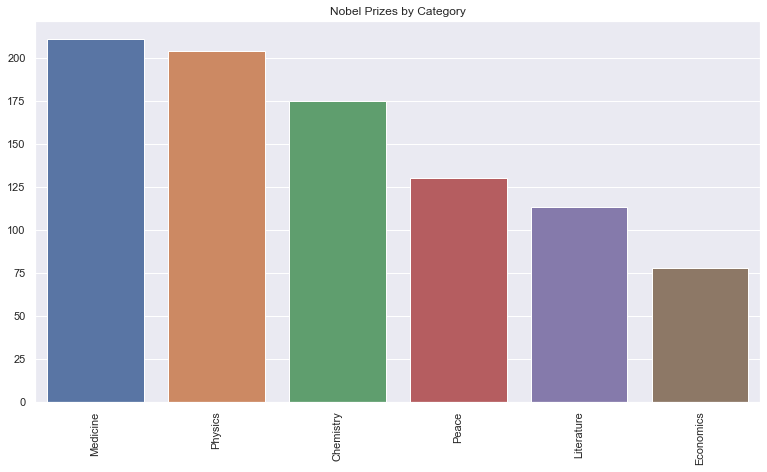

In [36]:
sns.barplot(x=cat.index,y=cat.values)
plt.xticks(rotation=90)
plt.title('Nobel Prizes by Category')
plt.show()

### Trend in Nobel Prize;

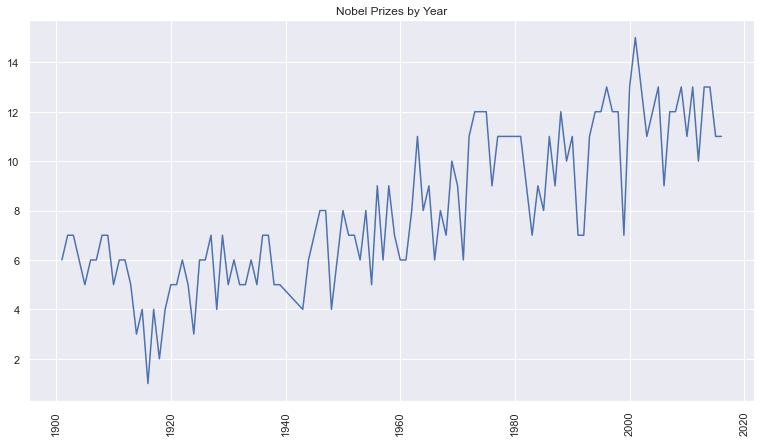

In [37]:
year = df['year'].value_counts()

sns.lineplot(x=year.index, y=year.values)

plt.xticks(rotation=90)
plt.title('Nobel Prizes by Year')
plt.show()

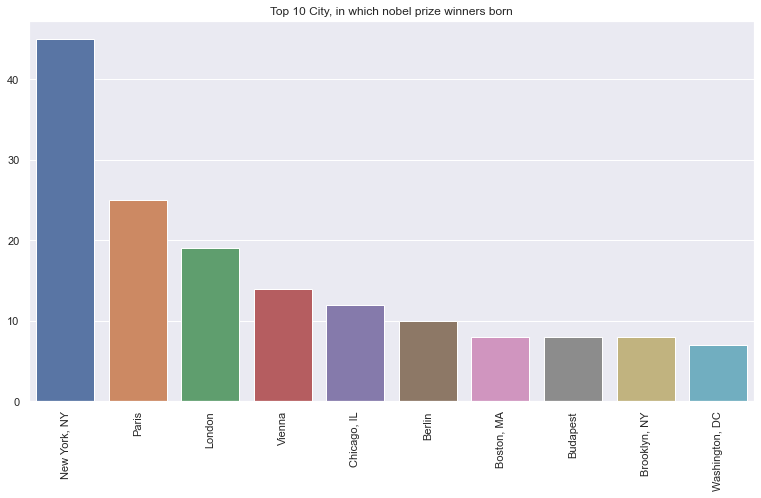

In [38]:
birth_city = df['birth_city'].value_counts().head(10)

sns.barplot(x=birth_city.index, y=birth_city.values)
plt.xticks(rotation=90)
plt.title('Top 10 City, in which nobel prize winners born')
plt.show()

## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>

In [39]:
# Picking out the first woman to win a Nobel Prize
df[df['sex'] == 'Female'].nsmallest(1,'year')


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_year,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,male_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,1867.0,...,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True,False


## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [40]:
# Selecting the laureates that have received 2 or more prizes.
df.groupby('full_name').filter(lambda x: len(x)>1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_year,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,male_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,1867.0,...,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True,False
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,1867.0,...,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True,False
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,1901.0,...,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False,True
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,1908.0,...,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False,True
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,1918.0,...,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False,True
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,1901.0,...,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False,True
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False,False


## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

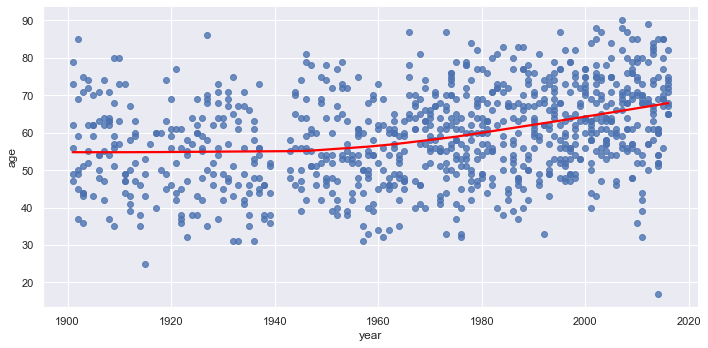

In [41]:
# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=df, lowess=True, aspect=2, line_kws={'color' : 'red'});

Distribution of Year and Age with Joint Plot.

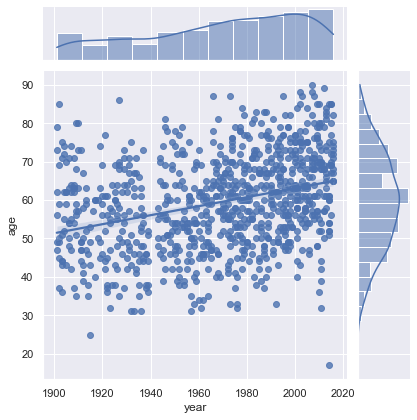

In [42]:
sns.jointplot(x='year', y='age', kind='reg', data=df)
plt.show()

Distribution of Age of Winners

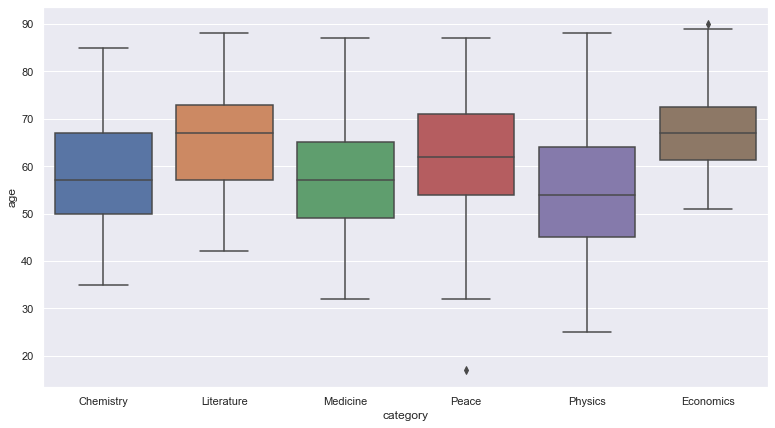

In [43]:
sns.boxplot(x='category', y='age', data=df)
plt.show()

## 9. Age differences between prize categories
<p>The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.</p>
<p>We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945). </p>
<p>Let's look at age trends within different prize categories.</p>

Lifespan of Nobel prize Winners

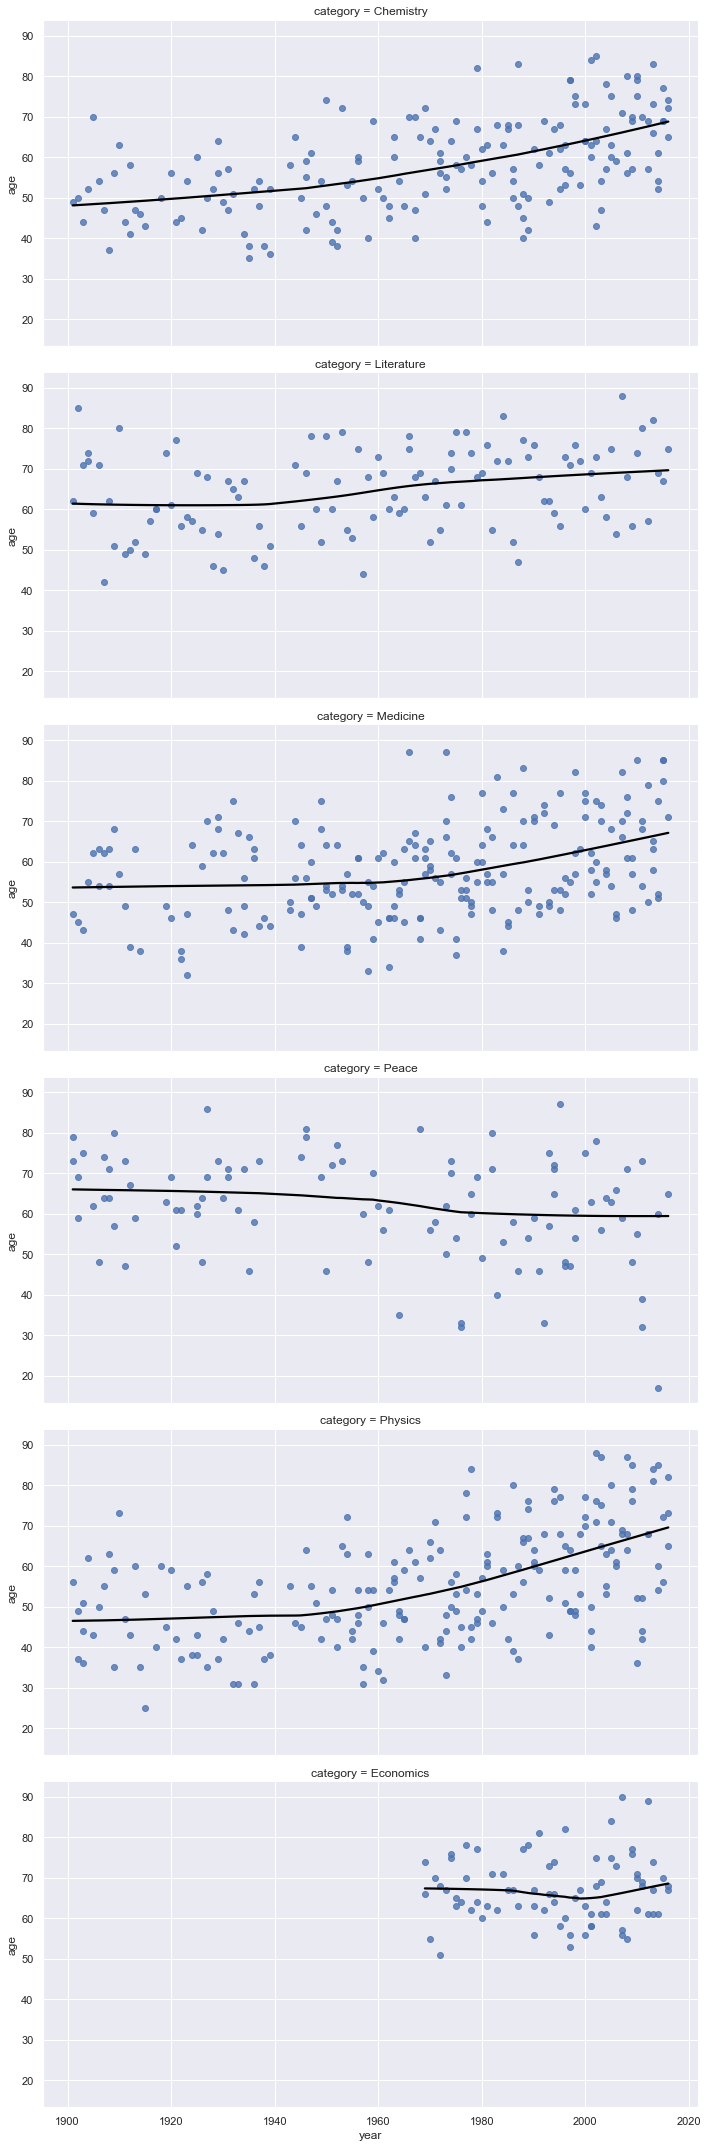

In [44]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x='year', y='age', row='category', data=df,lowess=True, aspect=2, line_kws={'color' : 'black'});

In [45]:
df['death_year'] = df['death_date'].str[0:4]
df['death_year'] = df['death_year'].replace(to_replace='NaN', value=0)
df['death_year'] = df['death_year'].apply(pd.to_numeric)

In [46]:
df['life_span'] = df['death_year'] - df['birth_year']

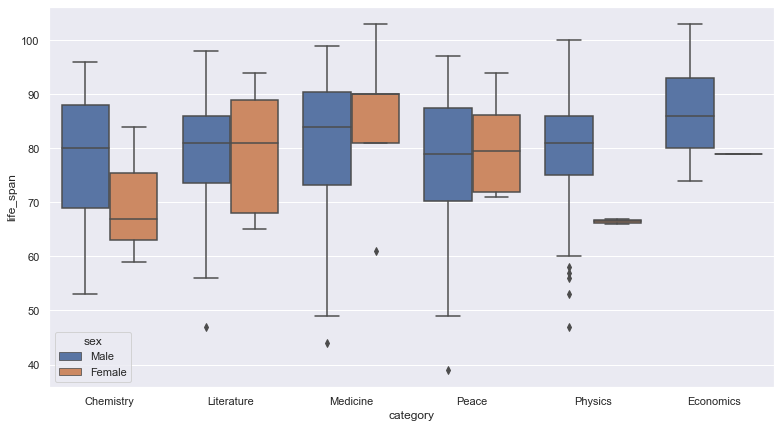

In [47]:
sns.boxplot(x='category', y='life_span', hue='sex', data=df)
plt.show()

Let's take a look at the women who won awards in the Physics and Economics category.

In [48]:
df.loc[(df['sex']=='Female') & ((df['category'] == 'Economics') | (df['category'] == 'Physics'))]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_year,...,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,male_winner,death_year,life_span
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,1867.0,...,NaN,1934-07-04,Sallanches,France,False,1900,True,False,1934.0,67.0
351,1963,Physics,The Nobel Prize in Physics 1963,"""for their discoveries concerning nuclear shel...",1/4,79,Individual,Maria Goeppert Mayer,1906-06-28,1906.0,...,United States of America,1972-02-20,"San Diego, CA",United States of America,False,1960,True,False,1972.0,66.0
819,2009,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for her analysis of economic governance, espe...",1/2,846,Individual,Elinor Ostrom,1933-08-07,1933.0,...,United States of America,2012-06-12,"Bloomington, IN",United States of America,True,2000,True,False,2012.0,79.0


Let's look at the image with a different approach;

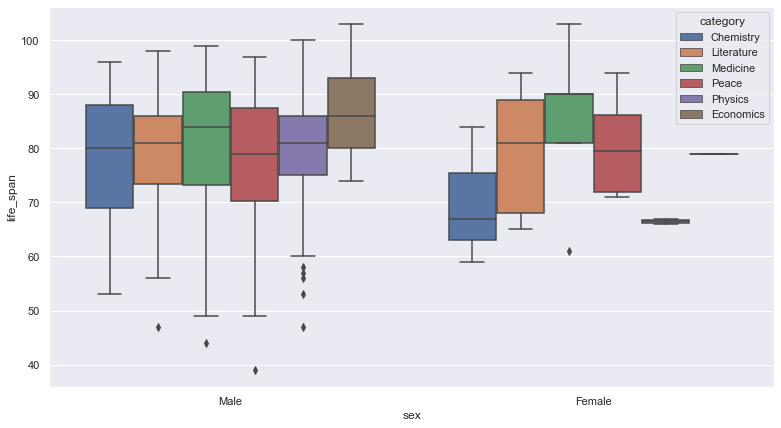

In [49]:
sns.boxplot(x='sex',y='life_span', hue='category', data=df)
plt.show()

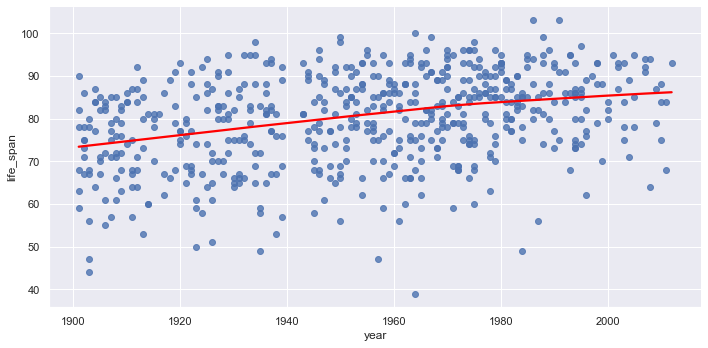

In [50]:
sns.lmplot('year','life_span',data=df,lowess=True, aspect=2,  line_kws={'color' : 'red'})
plt.show()

Laureate Types

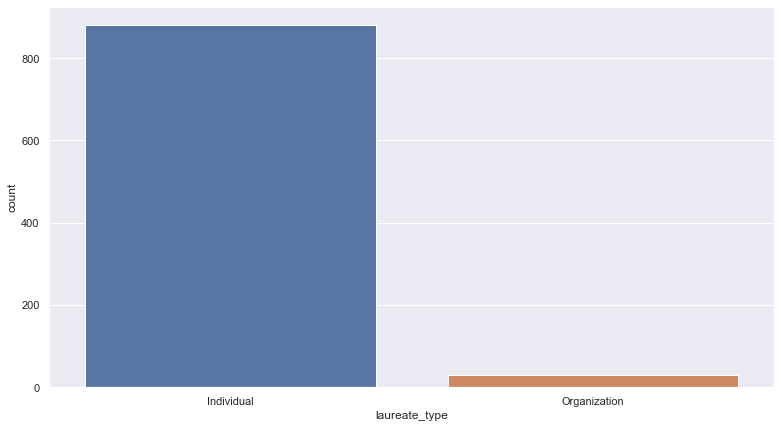

In [51]:
sns.countplot(df['laureate_type'])
plt.show()

## 10. Oldest and youngest winners
<p>More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger! </p>
<p>In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [52]:
# The oldest winner of a Nobel Prize as of 2016

old=df.nlargest(1,'age')

display(old[['category','full_name','prize', 'birth_country','sex','age']])

,category,full_name,prize,birth_country,sex,age
793,Economics,Leonid Hurwicz,The Sveriges Riksbank Prize in Economic Scienc...,Russia,Male,90.0


In [53]:
# The youngest winner of a Nobel Prize as of 2016

young=df.nsmallest(1,'age')

display(young[['category','full_name','prize', 'birth_country','sex','age']])

,category,full_name,prize,birth_country,sex,age
885,Peace,Malala Yousafzai,The Nobel Peace Prize 2014,Pakistan,Female,17.0


Plotting the top organization , which won the nobel prize the most.

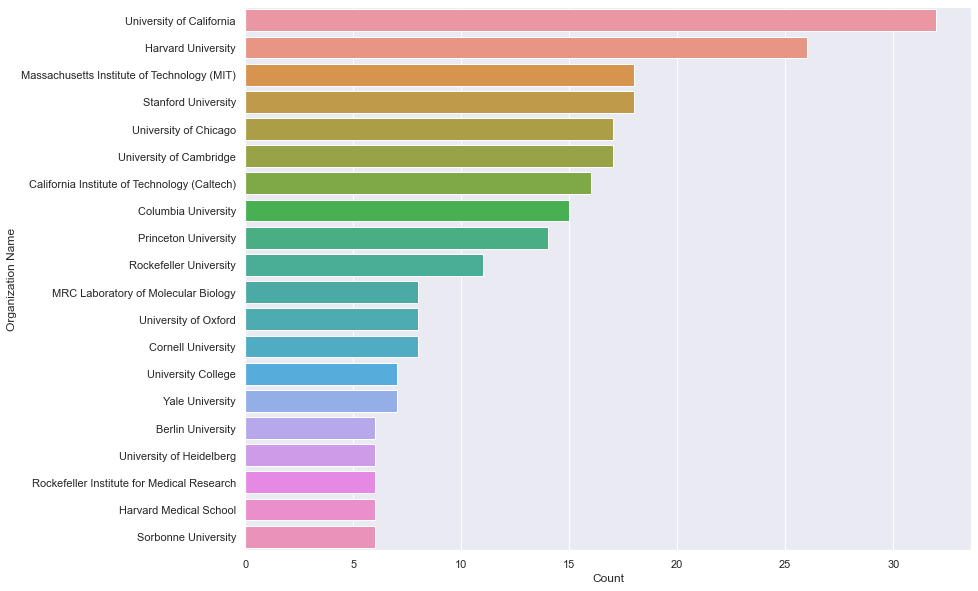

In [54]:
org = df['organization_name'].value_counts().reset_index().head(20)

plt.rcParams['figure.figsize'] = [13, 10]
sns.barplot(x='organization_name',y='index',data=org)
plt.ylabel('Organization Name')
plt.xlabel('Count')
plt.show()

In [55]:
from collections import Counter

#We seperate the Motivation column in a seperate Dataframe
motivation_column = df["motivation"]

#We drop all the rows which holds null values
motivation_column  = motivation_column.dropna(how='any',axis=0) 

# Then w apply Method counter that results in an array, at which each instance of that array includes
# a word and counter for each repetition for it.
common_words = Counter('"'.join(motivation_column.str.lower()).split()).most_common(100)
common_words

[('of', 1108),
 ('the', 1037),
 ('and', 511),
 ('their', 341),
 ('in', 324),
 ('his', 324),
 ('to', 193),
 ('discovery', 188),
 ('for', 157),
 ('discoveries', 154),
 ('concerning', 117),
 ('a', 113),
 ('on', 99),
 ('development', 92),
 ('with', 85),
 ('work', 83),
 ('which', 82),
 ('by', 77),
 ('contributions', 57),
 ('has', 54),
 ('theory', 53),
 ('recognition', 49),
 ('structure', 48),
 ('chemical', 43),
 ('economic', 42),
 ('that', 38),
 ('new', 37),
 ('pioneering', 37),
 ('fundamental', 33),
 ('he', 31),
 ('human', 31),
 ('studies', 30),
 ('its', 29),
 ('analysis', 29),
 ('especially', 28),
 ('methods', 26),
 ('an', 24),
 ('through', 24),
 ('investigations', 24),
 ('research', 22),
 ('as', 22),
 ('genetic', 22),
 ('into', 21),
 ('her', 21),
 ('cell', 20),
 ('invention', 20),
 ('mechanism', 20),
 ('important', 19),
 ('method', 19),
 ('services', 18),
 ('organic', 18),
 ('nuclear', 18),
 ('having', 18),
 ('efforts', 18),
 ('our', 17),
 ('atomic', 17),
 ('elementary', 17),
 ('quantum'

In [56]:
#in order to include stopwords in our code we had to use nltk.download() which will open a window for us,
#from which we can use stopwords to download 

# nltk.download()
import nltk
from nltk.corpus import stopwords

#By trial and error, we found that the process of eliminating the stop words from our data 
#needs to be done 3 times at least to get rid of all stop words
for i in range(0,3):
    for word in common_words:
        if word[0] in (stopwords.words('english')):
            common_words.remove(word)
common_words

[('discovery', 188),
 ('discoveries', 154),
 ('concerning', 117),
 ('development', 92),
 ('work', 83),
 ('contributions', 57),
 ('theory', 53),
 ('recognition', 49),
 ('structure', 48),
 ('chemical', 43),
 ('economic', 42),
 ('new', 37),
 ('pioneering', 37),
 ('fundamental', 33),
 ('human', 31),
 ('studies', 30),
 ('analysis', 29),
 ('especially', 28),
 ('methods', 26),
 ('investigations', 24),
 ('research', 22),
 ('genetic', 22),
 ('cell', 20),
 ('invention', 20),
 ('mechanism', 20),
 ('important', 19),
 ('method', 19),
 ('services', 18),
 ('organic', 18),
 ('nuclear', 18),
 ('efforts', 18),
 ('atomic', 17),
 ('elementary', 17),
 ('quantum', 17),
 ('synthesis"""for', 17),
 ('contribution', 16),
 ('poetic', 15),
 ('chemistry', 15),
 ('theoretical', 15),
 ('synthesis', 15),
 ('biological', 15),
 ('rendered', 13),
 ('art', 13),
 ('researches', 13),
 ('great', 13),
 ('connection', 13),
 ('field', 13),
 ('life', 13),
 ('high', 13),
 ('molecular', 13),
 ('system"""for', 13),
 ('role', 12),


In [57]:
#We created a dataframe that holds the word and its frequency in 2 separate columns

most_frequent = pd.DataFrame(common_words,columns=['Word', 'Frequency'])
most_frequent = most_frequent.head(10)
most_frequent

,Word,Frequency
0,discovery,188
1,discoveries,154
2,concerning,117
3,development,92
4,work,83
5,contributions,57
6,theory,53
7,recognition,49
8,structure,48
9,chemical,43


               Frequency
Word                    
discovery            188
discoveries          154
concerning           117
development           92
work                  83
contributions         57
theory                53
recognition           49
structure             48
chemical              43


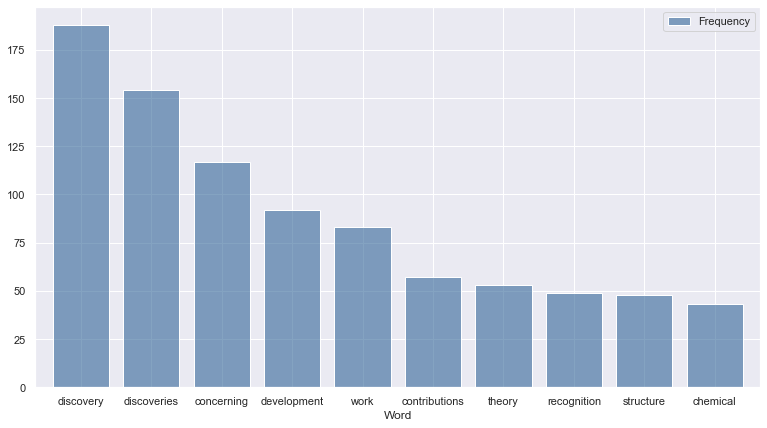

In [58]:
#We removed the index column and set the Word column to be the index, in order to make the visualization more clear.

most_frequent = most_frequent[most_frequent.Word != '"'].reset_index()
del most_frequent['index']
most_frequent = most_frequent.set_index('Word')
print(most_frequent)
most_frequent.plot.bar(rot=0, figsize=(13,7), width=0.8,  color=(0.2, 0.4, 0.6, 0.6));

## 11. You get a prize!
<p><img style="float: right;margin:20px 20px 20px 20px; max-width:200px" src="https://assets.datacamp.com/production/project_441/img/paint_nobel_prize.png"></p>
<p>Hey! You get a prize for making it to the very end of this notebook! It might not be a Nobel Prize, but I made it myself in paint so it should count for something. But don't despair, Leonid Hurwicz was 90 years old when he got his prize, so it might not be too late for you. Who knows.</p>
<p>Before you leave, what was again the name of the youngest winner ever who in 2014 got the prize for "[her] struggle against the suppression of children and young people and for the right of all children to education"?</p>

In [59]:
# The name of the youngest winner of the Nobel Prize as of 2016
youngest_winner = 'Malala Yousafzai'

Let's note! 
If we want to examine the one_hot and label encoder approaches;

## 12. Data Analysis

Now that we are done with the part of visualizing our data we have reached the part of answering the target questions.

* The most won prize: is the Medicine prize (211 prizes), physics prize (203 prizes), chemistry prize (173 prizes)
* America has complete dominance over nobel awards compared to other countries, indicating its leadership in science and research.
* The history of nobel awards was more male-dominated, with the males count highly exceeding females count.
* The average Age of a nobel laureate when they got the prize is 60-70
* The most repeated words in the motivation behind winning the prize are "discoveries", "developments", "contributions".

In summar, a typical nobel prize winnner is a male american with age ranging between 60-70 who did some discoveries, or contributions in the medicine, physics or chemistry field, most probably working for an organization.

Now, Let's note if we want to examine the one_hot and label encoder approaches;

In [60]:
df.shape

(911, 26)

In [61]:
oneHotEncoder = OneHotEncoder()

oh = oneHotEncoder.fit_transform(df['laureate_type'].values.reshape(-1,1)).toarray()

dfOneHot = pd.DataFrame(oh, columns = ['Individual', 'Organization'])
dfgd = pd.get_dummies(dfOneHot)

df.reset_index(drop=True, inplace=True)
dfgd.reset_index(drop=True, inplace=True)

df = pd.concat([df, dfgd], axis=1)

df.sample(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_year,...,death_city,death_country,usa_born_winner,decade,female_winner,male_winner,death_year,life_span,Individual,Organization
382,1967,Medicine,The Nobel Prize in Physiology or Medicine 1967,"""for their discoveries concerning the primary ...",1/3,387,Individual,George Wald,1906-11-18,1906.0,...,"Cambridge, MA",United States of America,True,1960,False,True,1997.0,91.0,1.0,0.0
65,1911,Peace,The Nobel Peace Prize 1911,NaN,1/2,478,Individual,Tobias Michael Carel Asser,1838-04-28,1838.0,...,the Hague,Netherlands,False,1910,False,True,1913.0,75.0,1.0,0.0
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,1901.0,...,"Big Sur, CA",United States of America,True,1950,False,True,1994.0,93.0,1.0,0.0
74,1913,Chemistry,The Nobel Prize in Chemistry 1913,"""in recognition of his work on the linkage of ...",1/1,174,Individual,Alfred Werner,1866-12-12,1866.0,...,Zurich,Switzerland,False,1910,False,True,1919.0,53.0,1.0,0.0
811,2008,Medicine,The Nobel Prize in Physiology or Medicine 2008,"""for their discovery of human immunodeficiency...",1/4,825,Individual,Luc Montagnier,1932-08-18,1932.0,...,NaN,NaN,False,2000,False,True,NaN,NaN,1.0,0.0


Let's examine 'category' column.

In [62]:
df['category'].value_counts()

Medicine      211
Physics       204
Chemistry     175
Peace         130
Literature    113
Economics      78
Name: category, dtype: int64

In [63]:
oneHotEncoder = OneHotEncoder()

oh = oneHotEncoder.fit_transform(df['category'].values.reshape(-1,1)).toarray()

dfOneHot = pd.DataFrame(oh, columns = ['Chemistry', 'Economics', 'Literature', 'Medicine', 'Peace', 'Physics'])
dfgd = pd.get_dummies(dfOneHot)

df.reset_index(drop=True, inplace=True)
dfgd.reset_index(drop=True, inplace=True)

df = pd.concat([df, dfgd], axis=1)

df.sample(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_year,...,death_year,life_span,Individual,Organization,Chemistry,Economics,Literature,Medicine,Peace,Physics
613,1991,Chemistry,The Nobel Prize in Chemistry 1991,"""for his contributions to the development of t...",1/1,276,Individual,Richard R. Ernst,1933-08-14,1933.0,...,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
282,1954,Medicine,The Nobel Prize in Physiology or Medicine 1954,"""for their discovery of the ability of poliomy...",1/3,358,Individual,Frederick Chapman Robbins,1916-08-25,1916.0,...,2003.0,87.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
256,1950,Peace,The Nobel Peace Prize 1950,NaN,1/1,511,Individual,Ralph Bunche,1904-08-07,1904.0,...,1971.0,67.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
528,1982,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his seminal studies of industrial structu...",1/1,696,Individual,George J. Stigler,1911-01-17,1911.0,...,1991.0,80.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
457,1975,Medicine,The Nobel Prize in Physiology or Medicine 1975,"""for their discoveries concerning the interact...",1/3,407,Individual,Renato Dulbecco,1914-02-22,1914.0,...,2012.0,98.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


There is a problem with Nan values in this column for the organization records. Therefore we make a dictionary and map.

In [64]:
#create the dictionary
dict = {'Male' : 0, 'Female' : 1} 

#convert it into categorical
df['sex'] = df['sex'].astype('category')  

#Remap the values of the dataframe 
df['sex'] = df['sex'].map(dict)

df.sample(10)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_year,...,death_year,life_span,Individual,Organization,Chemistry,Economics,Literature,Medicine,Peace,Physics
379,1967,Literature,The Nobel Prize in Literature 1967,"""for his vivid literary achievement, deep-root...",1/1,641,Individual,Miguel Angel Asturias,1899-10-19,1899.0,...,1974.0,75.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
132,1926,Physics,The Nobel Prize in Physics 1926,"""for his work on the discontinuous structure o...",1/1,32,Individual,Jean Baptiste Perrin,1870-09-30,1870.0,...,1942.0,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
796,2007,Literature,The Nobel Prize in Literature 2007,"""that epicist of the female experience, who wi...",1/1,817,Individual,Doris Lessing,1919-10-22,1919.0,...,2013.0,94.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
747,2003,Chemistry,The Nobel Prize in Chemistry 2003,"""for discoveries concerning channels in cell m...",1/2,769,Individual,Peter Agre,1949-01-30,1949.0,...,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
228,1946,Medicine,The Nobel Prize in Physiology or Medicine 1946,"""for the discovery of the production of mutati...",1/1,342,Individual,Hermann Joseph Muller,1890-12-21,1890.0,...,1967.0,77.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
65,1911,Peace,The Nobel Peace Prize 1911,NaN,1/2,478,Individual,Tobias Michael Carel Asser,1838-04-28,1838.0,...,1913.0,75.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
245,1949,Literature,The Nobel Prize in Literature 1949,"""for his powerful and artistically unique cont...",1/1,620,Individual,William Faulkner,1897-09-25,1897.0,...,1962.0,65.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
511,1980,Medicine,The Nobel Prize in Physiology or Medicine 1980,"""for their discoveries concerning genetically ...",1/3,420,Individual,Jean Dausset,1916-10-19,1916.0,...,2009.0,93.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
443,1974,Literature,The Nobel Prize in Literature 1974,"""for writings that catch the dewdrop and refle...",1/2,650,Individual,Harry Martinson,1904-05-06,1904.0,...,1978.0,74.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
90,1917,Physics,The Nobel Prize in Physics 1917,"""for his discovery of the characteristic R&oum...",1/1,22,Individual,Charles Glover Barkla,1877-06-07,1877.0,...,1944.0,67.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
